# Transport_DATA ANALYSIS

Data preparation
Got the data from 3 different files
1. Adjustments.CSV
2. Products.CSV
3. Trips.CSV
Merged them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datasist as ds

import warnings
warnings.filterwarnings(action='ignore')

Getting the Files

In [2]:
df_Adjustments = pd.read_csv("C:/Users/uma-r/OneDrive/Desktop/SQL/Insurance_Data/Technical Challenge/Data Analyst Challenge/adjustments.csv")
df_Products = pd.read_csv("C:/Users/uma-r/OneDrive/Desktop/SQL/Insurance_Data/Technical Challenge/Data Analyst Challenge/products.csv")
df_Trips = pd.read_csv("C:/Users/uma-r/OneDrive/Desktop/SQL/Insurance_Data/Technical Challenge/Data Analyst Challenge/trips.csv")

Reading the files data

In [3]:
df_Adjustments.head()

,product_id,trip_id,adjustment_id,adjustment_amount,adjustment_type,applied,zone_ids_used
0,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,3cc69047-1cb5-492f-a198-07d9abf12768,66c833c1-e424-4f3c-932d-2532ff6f2be9,0.0,DAILY_CAP,False,NaN
1,734f80f1-367a-4642-a482-ab18ae3668aa,2da54454-c75e-40df-94be-d2e3193482fc,21bc9dc5-7ca2-49c7-bd84-aaefd434d4d8,0.0,DAILY_CAP,False,NaN
2,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,e72fea60-4a9e-450c-b2ab-fcf9e4811a19,89c39cd0-95b8-4d39-9245-3a4a4df21f2b,0.0,DAILY_CAP,False,NaN
3,37f8562e-969d-4d75-84dd-70709b9893c4,fc698a2e-47c5-471e-afb2-30766da7cc41,e0100722-e09a-4e3d-bd14-e78484ff8aff,0.0,DAILY_CAP,False,NaN
4,734f80f1-367a-4642-a482-ab18ae3668aa,c0917260-9876-4e7c-adbb-3396defcf518,3270ad3e-5735-4c4e-acdb-78fa6e2aa92a,0.0,DAILY_CAP,False,NaN


In [4]:
df_Products.head()

,id,product_type,capping_type,created_date,start_date_utc,status,rules_default_limit,rules_max_fare_value,rules_transaction_types,rules_from_time_local,rules_to_time_local,rules_weekly_cap_start_day,rules_capping_duration_in_minutes,rules_number_of_transfer
0,734f80f1-367a-4642-a482-ab18ae3668aa,CAPPING,DAILY_CAP,2019-07-17T15:30:56Z,2019-07-17T15:30:56Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
1,37f8562e-969d-4d75-84dd-70709b9893c4,CAPPING,DAILY_CAP,2019-07-17T15:42:56Z,2019-07-17T15:42:56Z,ACTIVE,4.5,4.5,"autoscan, variable",18:00:00,03:59:59,SUNDAY,0.0,NaN
2,29edf630-870f-4b84-9113-ade5ab2413a0,CAPPING,DAILY_CAP,2019-07-17T15:44:57Z,2019-07-17T15:44:57Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
3,9e564b22-fb50-4e66-b947-52fb50bacbc0,CAPPING,DAILY_CAP,2019-07-17T15:54:18Z,2019-07-17T15:54:18Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
4,41791521-18f3-45c3-9c40-e611ac0cdade,CAPPING,DAILY_CAP,2019-07-17T15:56:29Z,2019-07-17T15:56:29Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN


Renaming the Id field to Product_Id in order to merge the files

In [5]:
df_Products.rename(columns={"id":"product_id"}, inplace=True)

In [6]:
df_Products.head()

,product_id,product_type,capping_type,created_date,start_date_utc,status,rules_default_limit,rules_max_fare_value,rules_transaction_types,rules_from_time_local,rules_to_time_local,rules_weekly_cap_start_day,rules_capping_duration_in_minutes,rules_number_of_transfer
0,734f80f1-367a-4642-a482-ab18ae3668aa,CAPPING,DAILY_CAP,2019-07-17T15:30:56Z,2019-07-17T15:30:56Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
1,37f8562e-969d-4d75-84dd-70709b9893c4,CAPPING,DAILY_CAP,2019-07-17T15:42:56Z,2019-07-17T15:42:56Z,ACTIVE,4.5,4.5,"autoscan, variable",18:00:00,03:59:59,SUNDAY,0.0,NaN
2,29edf630-870f-4b84-9113-ade5ab2413a0,CAPPING,DAILY_CAP,2019-07-17T15:44:57Z,2019-07-17T15:44:57Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
3,9e564b22-fb50-4e66-b947-52fb50bacbc0,CAPPING,DAILY_CAP,2019-07-17T15:54:18Z,2019-07-17T15:54:18Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
4,41791521-18f3-45c3-9c40-e611ac0cdade,CAPPING,DAILY_CAP,2019-07-17T15:56:29Z,2019-07-17T15:56:29Z,ACTIVE,5.2,5.2,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN


In [7]:
df_Trips.head()

,customer_id,charge_id,trip_id,tap_on_id,tap_on_date,tap_off_id,tap_off_date,original_amount,adjusted_amount,service_type,direction,fare_type,trip_completion
0,cce09b29-9679-4442-8608-e3ebd6d4b6a7,955ebe41-8ebc-431d-b47e-1de03a9000b1,955ebe41-8ebc-431d-b47e-1de03a9000b1,294FCABF06B763DFEF9D07EBE036B9E3FF55BC33,02:58.0,NaN,NaN,3.0,3.0,bus,inbound,retail_fare,complete
1,cce09b29-9679-4442-8608-e3ebd6d4b6a7,704fa471-9b8a-49e3-820f-23c952b70634,704fa471-9b8a-49e3-820f-23c952b70634,DD11C3C6DA5B315F9D0CB9419971BAFD1F739160,52:01.0,NaN,NaN,1.5,1.5,bus,outbound,retail_fare,complete
2,cce09b29-9679-4442-8608-e3ebd6d4b6a7,b215446f-d3f6-430a-bfcf-2b85e6ab967c,81e6196d-593f-4880-81e3-b00c30e144cd,436460362CC9FE827C422BF31A6248874B3EE2D6,41:57.0,NaN,NaN,2.5,2.5,bus,inbound,retail_fare,complete
3,72c4422d-4c9f-4484-8f8e-be57d03bd053,82adc4d6-efef-467a-a9cb-12c36f9cf140,82adc4d6-efef-467a-a9cb-12c36f9cf140,18E637167E49C0DCD012D24B163D471CEBB3AB7F,01:01.0,NaN,NaN,2.5,2.5,bus,outbound,retail_fare,complete
4,4178c0f2-cc5f-408e-b013-be6a299ce019,1386d924-6242-4737-b1eb-dbf613f2ed0e,1386d924-6242-4737-b1eb-dbf613f2ed0e,1B8C25294DBCFF462AE0D046AA51EB0FF48ABEDA,35:57.0,NaN,NaN,1.7,1.7,bus,outbound,retail_fare,complete


Merging the files based on the common field

In [8]:
Merged_data = df_Adjustments.merge(df_Products,on=["product_id"])
Merged_data.head()

,product_id,trip_id,adjustment_id,adjustment_amount,adjustment_type,applied,zone_ids_used,product_type,capping_type,created_date,start_date_utc,status,rules_default_limit,rules_max_fare_value,rules_transaction_types,rules_from_time_local,rules_to_time_local,rules_weekly_cap_start_day,rules_capping_duration_in_minutes,rules_number_of_transfer
0,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,3cc69047-1cb5-492f-a198-07d9abf12768,66c833c1-e424-4f3c-932d-2532ff6f2be9,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,2019-07-17T15:57:54Z,ACTIVE,7.8,7.8,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
1,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,e72fea60-4a9e-450c-b2ab-fcf9e4811a19,89c39cd0-95b8-4d39-9245-3a4a4df21f2b,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,2019-07-17T15:57:54Z,ACTIVE,7.8,7.8,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
2,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,98136d26-a4aa-4302-8035-5b26d4420ab4,7e6b576d-b63c-4855-9a4c-1c673d133035,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,2019-07-17T15:57:54Z,ACTIVE,7.8,7.8,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
3,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,a152850d-ac51-4e15-a70a-c79a4ebf47d4,e083540d-dadd-4579-9a9c-2c6ae02d732f,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,2019-07-17T15:57:54Z,ACTIVE,7.8,7.8,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN
4,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,e1eb9bc5-055e-41ce-9acd-ebfdf7d5c30f,700838a3-2999-455a-a4cc-27d1389fc943,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,2019-07-17T15:57:54Z,ACTIVE,7.8,7.8,"autoscan, variable",00:00:00,23:59:59,SUNDAY,0.0,NaN


In [9]:
Data = Merged_data.merge(df_Trips,on=["trip_id"])
Data.head()

,product_id,trip_id,adjustment_id,adjustment_amount,adjustment_type,applied,zone_ids_used,product_type,capping_type,created_date,...,tap_on_id,tap_on_date,tap_off_id,tap_off_date,original_amount,adjusted_amount,service_type,direction,fare_type,trip_completion
0,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,3cc69047-1cb5-492f-a198-07d9abf12768,66c833c1-e424-4f3c-932d-2532ff6f2be9,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,...,51417F32A58FD37A1509FBFA043892C5079710A2,53:52.0,5D4086593F9993481CD62C5015EBDD167DB64ABE,25:40.0,2.50,2.50,bus,outbound,variable_fare,complete
1,734f80f1-367a-4642-a482-ab18ae3668aa,3cc69047-1cb5-492f-a198-07d9abf12768,b0951e22-257c-4bc3-b25b-75dc4c5ffc14,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:30:56Z,...,51417F32A58FD37A1509FBFA043892C5079710A2,53:52.0,5D4086593F9993481CD62C5015EBDD167DB64ABE,25:40.0,2.50,2.50,bus,outbound,variable_fare,complete
2,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,e72fea60-4a9e-450c-b2ab-fcf9e4811a19,89c39cd0-95b8-4d39-9245-3a4a4df21f2b,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,...,5BCFE77574DEC8B775AED0566308810381C20FAB,09:04.0,02C0C27FECE46DCEA6C6F67AB5C2AF9DBF4C1CC0,14:32.0,0.25,0.25,bus,outbound,variable_fare,complete
3,29edf630-870f-4b84-9113-ade5ab2413a0,e72fea60-4a9e-450c-b2ab-fcf9e4811a19,180b3b1f-086a-4df2-b89c-716175e45986,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:44:57Z,...,5BCFE77574DEC8B775AED0566308810381C20FAB,09:04.0,02C0C27FECE46DCEA6C6F67AB5C2AF9DBF4C1CC0,14:32.0,0.25,0.25,bus,outbound,variable_fare,complete
4,b6de8022-2d7b-46db-aa9f-5bd5e77185b9,98136d26-a4aa-4302-8035-5b26d4420ab4,7e6b576d-b63c-4855-9a4c-1c673d133035,0.0,DAILY_CAP,False,NaN,CAPPING,DAILY_CAP,2019-07-17T15:57:54Z,...,F25A8D09727042DF8E554E4FA7292D0D3F7AF1C6,25:01.0,ECA309411F6C6F1A02986ACACD4895B654093E7D,36:41.0,2.40,2.40,bus,inbound,variable_fare,complete


To get the information about columns(datatype)

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 46032
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   product_id                         46033 non-null  object 
 1   trip_id                            46033 non-null  object 
 2   adjustment_id                      46033 non-null  object 
 3   adjustment_amount                  46033 non-null  float64
 4   adjustment_type                    46033 non-null  object 
 5   applied                            46033 non-null  bool   
 6   zone_ids_used                      0 non-null      float64
 7   product_type                       46033 non-null  object 
 8   capping_type                       46033 non-null  object 
 9   created_date                       46033 non-null  object 
 10  start_date_utc                     46033 non-null  object 
 11  status                             46033 non-null  obj

To get the information about the Null values

In [22]:
Data.isnull().sum()

product_id                               0
trip_id                                  0
adjustment_id                            0
adjustment_amount                        0
adjustment_type                          0
applied                                  0
zone_ids_used                        46033
product_type                             0
capping_type                             0
created_date                             0
start_date_utc                           0
status                                   0
rules_default_limit                      0
rules_max_fare_value                     0
rules_transaction_types                  0
rules_from_time_local                    0
rules_to_time_local                      0
rules_weekly_cap_start_day               0
rules_capping_duration_in_minutes        0
rules_number_of_transfer             46033
customer_id                              0
charge_id                                0
tap_on_id                                0
tap_on_date

To get the Statistics description

In [11]:
Data.describe()

,adjustment_amount,zone_ids_used,rules_default_limit,rules_max_fare_value,rules_capping_duration_in_minutes,rules_number_of_transfer,original_amount,adjusted_amount
count,46033.000000,0.0,46033.000000,46033.000000,46033.0,0.0,46033.000000,46033.000000
mean,0.040950,NaN,6.552202,6.552202,0.0,NaN,2.361363,2.281957
std,0.295323,NaN,1.353102,1.353102,0.0,NaN,0.743926,0.827219
min,0.000000,NaN,4.500000,4.500000,0.0,NaN,0.100000,0.000000
25%,0.000000,NaN,5.200000,5.200000,0.0,NaN,2.300000,1.700000
50%,0.000000,NaN,7.800000,7.800000,0.0,NaN,2.500000,2.500000
75%,0.000000,NaN,7.800000,7.800000,0.0,NaN,2.500000,2.500000
max,6.600000,NaN,7.800000,7.800000,0.0,NaN,6.700000,6.700000


# Insights from Description above
Avg Adjustment_amount - 0.04, Min - 0.0 and Max - 6.6 
Aug Adjusted_amount - 2.28, Min - 0.0 and Max - 6.7

Unique Values and their counts for the columns in the data set

In [13]:
ds.structdata.class_count(Data)

Class Count for product_id


,product_id
b6de8022-2d7b-46db-aa9f-5bd5e77185b9,24711
734f80f1-367a-4642-a482-ab18ae3668aa,14112
37f8562e-969d-4d75-84dd-70709b9893c4,2861
29edf630-870f-4b84-9113-ade5ab2413a0,2756
9e564b22-fb50-4e66-b947-52fb50bacbc0,1478
41791521-18f3-45c3-9c40-e611ac0cdade,115


Unique classes in trip_id too large
Unique classes in adjustment_id too large
Class Count for adjustment_type


,adjustment_type
DAILY_CAP,46033


Class Count for product_type


,product_type
CAPPING,46033


Class Count for capping_type


,capping_type
DAILY_CAP,46033


Class Count for created_date


,created_date
2019-07-17T15:57:54Z,24711
2019-07-17T15:30:56Z,14112
2019-07-17T15:42:56Z,2861
2019-07-17T15:44:57Z,2756
2019-07-17T15:54:18Z,1478
2019-07-17T15:56:29Z,115


Class Count for start_date_utc


,start_date_utc
2019-07-17T15:57:54Z,24711
2019-07-17T15:30:56Z,14112
2019-07-17T15:42:56Z,2861
2019-07-17T15:44:57Z,2756
2019-07-17T15:54:18Z,1478
2019-07-17T15:56:29Z,115


Class Count for status


,status
ACTIVE,46033


Class Count for rules_transaction_types


,rules_transaction_types
"autoscan, variable",46033


Class Count for rules_from_time_local


,rules_from_time_local
00:00:00,43172
18:00:00,2861


Class Count for rules_to_time_local


,rules_to_time_local
23:59:59,43172
03:59:59,2861


Class Count for rules_weekly_cap_start_day


,rules_weekly_cap_start_day
SUNDAY,46033


Unique classes in customer_id too large
Unique classes in charge_id too large
Unique classes in tap_on_id too large
Unique classes in tap_on_date too large
Unique classes in tap_off_id too large
Unique classes in tap_off_date too large
Class Count for service_type


,service_type
bus,46033


Class Count for direction


,direction
outbound,23393
inbound,22640


Class Count for fare_type


,fare_type
variable_fare,46033


Class Count for trip_completion


,trip_completion
complete,35719
incomplete,10314


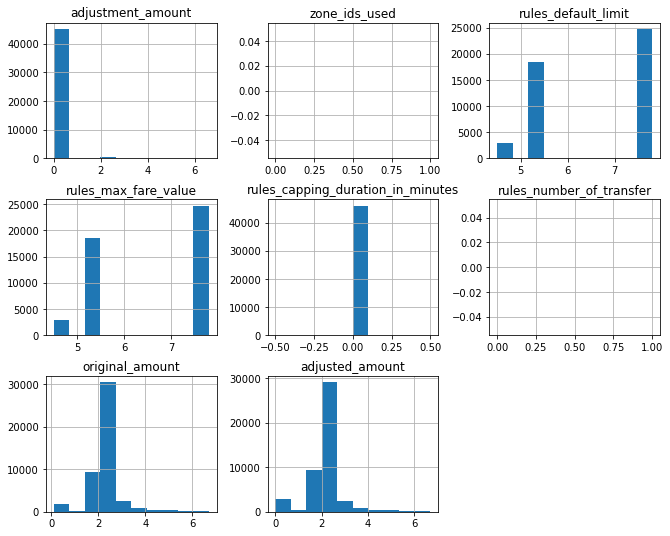

In [14]:
# Distribution of Numerical Variables
fg,ax = plt.subplots(figsize = (11,9))
Data.hist(ax=ax)
plt.show()

How the Adjustment_amount gets effected when the Product is Applied based on the direction

<AxesSubplot:xlabel='adjustment_amount', ylabel='applied'>

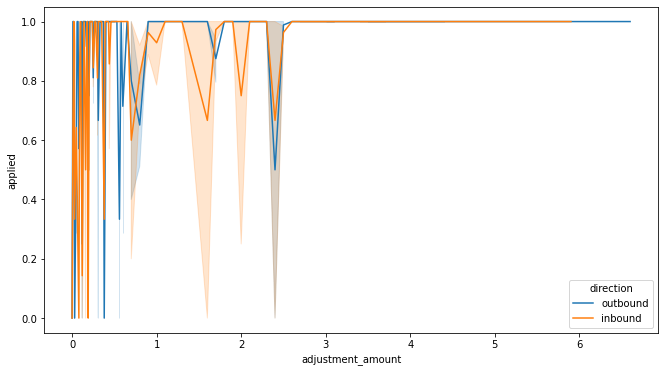

In [15]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=Data, x='adjustment_amount', y='applied', hue='direction', ax=ax)

How the Adjustment_amount gets effected when the Product is Applied based on the trip_completion

<AxesSubplot:xlabel='adjustment_amount', ylabel='applied'>

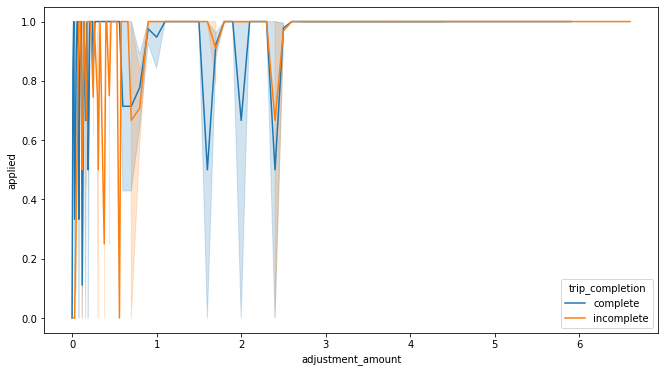

In [16]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=Data, x='adjustment_amount', y='applied', hue='trip_completion', ax=ax)

How the Adjustment_amount gets effected when the Product is Applied based on the Service_Type

<AxesSubplot:xlabel='adjustment_amount', ylabel='applied'>

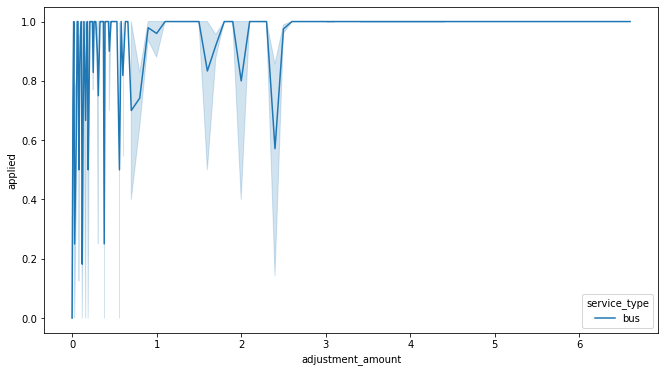

In [17]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=Data, x='adjustment_amount', y='applied', hue='service_type', ax=ax)

How the Adjustment_amount gets effected when the Product is Applied based on the Fare_Type

<AxesSubplot:xlabel='adjustment_amount', ylabel='applied'>

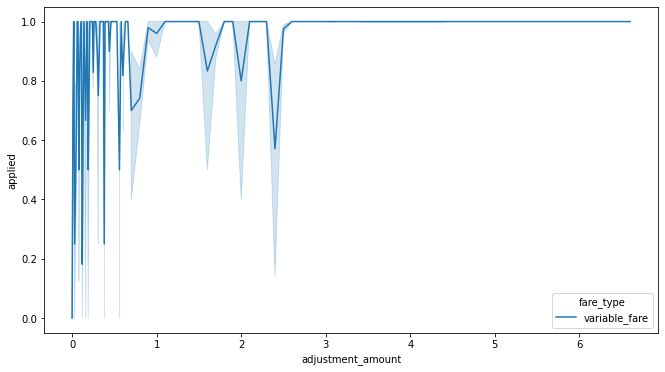

In [18]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=Data, x='adjustment_amount', y='applied', hue='fare_type', ax=ax)

Correlation Analysis
We can see how the Adjustment_amount is related to the Applied field

<AxesSubplot:>

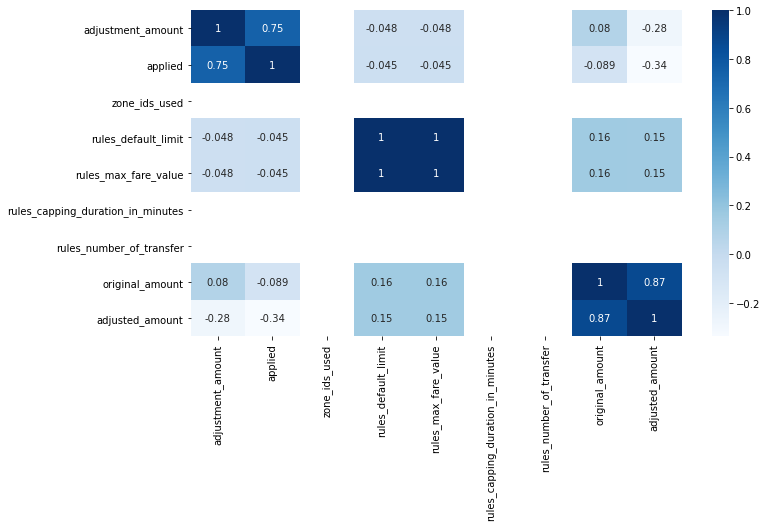

In [20]:
fig, ax = plt.subplots(figsize=(11,6))
sns.heatmap(Data.corr(),cmap='Blues',annot=True,ax=ax)